### Gaussian Mixture Model

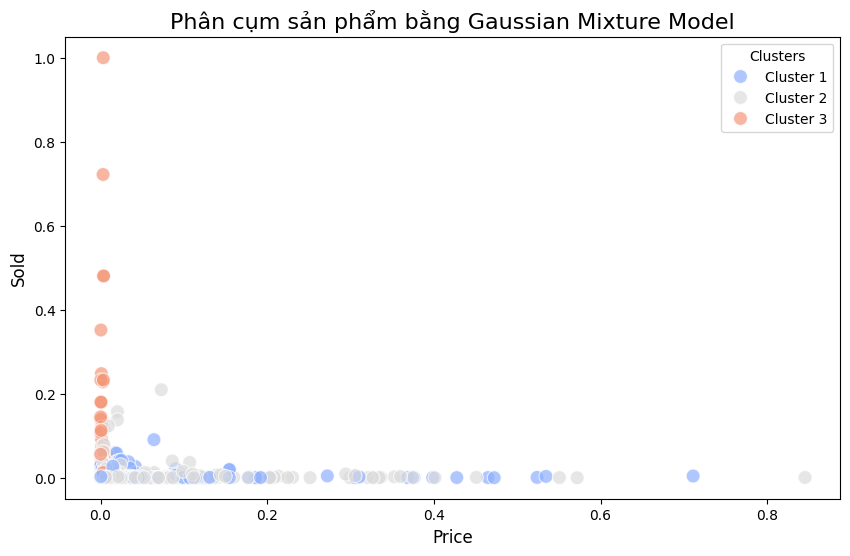

Sản phẩm bán chạy nhất trong từng cụm (GMM):
                                          product_name     price      sold  \
7    Kingspec 2.5 inche SATA3 SSD120GB 240GB 480GB ...  0.064102  0.090546   
244  Kingspec 2.5 inche Dung lượng SSD 128GB 256GB ...  0.072943  0.209556   
300  M1 Xách Tay Bluetooth Loa Âm Nhạc Stereo Surro...  0.003295  1.000000   

     gmm_cluster  
7              0  
244            1  
300            2  


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

# Bước 1: Tải dữ liệu
train_data = pd.read_csv("../data/processed/train_data.csv")

# Bước 2: Chọn các đặc trưng cần thiết cho việc phân cụm
selected_features = ['rating', 'comment_count', 'price', 'sold']
X = train_data[selected_features]

# Bước 3: Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Bước 4: Áp dụng Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)  # 3 cụm
train_data['gmm_cluster'] = gmm.fit_predict(X_scaled)

# Bước 5: Gán nhãn cụm
cluster_labels = {0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3'}
train_data['gmm_cluster_label'] = train_data['gmm_cluster'].map(cluster_labels)

# Bước 6: Vẽ biểu đồ phân cụm
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='price', y='sold', hue='gmm_cluster_label', palette='coolwarm', s=100, alpha=0.7)
plt.title('Phân cụm sản phẩm bằng Gaussian Mixture Model', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Sold', fontsize=12)
plt.legend(title='Clusters')
plt.show()

# Bước 7: Xác định sản phẩm bán chạy nhất trong từng cụm
top_products = train_data.loc[train_data.groupby('gmm_cluster')['sold'].idxmax()]
print("Sản phẩm bán chạy nhất trong từng cụm (GMM):")
print(top_products[['product_name', 'price', 'sold', 'gmm_cluster']])
